# Mô hình CNN nhận diện chữ viết tay sử dụng TensorFlow/Keras

Notebook này xây dựng một mô hình CNN (Convolutional Neural Network) sử dụng TensorFlow và Keras để nhận diện chữ số viết tay từ bộ dữ liệu MNIST.

## Các bước thực hiện:
1. Tải dữ liệu MNIST từ keras.datasets
2. Xử lý và chuẩn hóa dữ liệu
3. Xây dựng mô hình CNN với các lớp: Conv2D, MaxPooling2D, Flatten, Dense, Dropout
4. Huấn luyện mô hình
5. Đánh giá mô hình
6. Lưu mô hình đã huấn luyện


## 1. Import các thư viện cần thiết


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Kiểm tra phiên bản TensorFlow
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


TensorFlow version: 2.20.0
Keras version: 3.11.3


## 2. Tải dữ liệu MNIST


In [2]:
# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Shape của x_train: {x_train.shape}")
print(f"Shape của y_train: {y_train.shape}")
print(f"Shape của x_test: {x_test.shape}")
print(f"Shape của y_test: {y_test.shape}")
print(f"\nSố lớp: {len(np.unique(y_train))}")
print(f"Giá trị pixel min: {x_train.min()}, max: {x_train.max()}")


Shape của x_train: (60000, 28, 28)
Shape của y_train: (60000,)
Shape của x_test: (10000, 28, 28)
Shape của y_test: (10000,)

Số lớp: 10
Giá trị pixel min: 0, max: 255


## 3. Xử lý và chuẩn hóa dữ liệu


In [3]:
# Reshape dữ liệu để thêm chiều channel (cho CNN)
# MNIST là ảnh grayscale nên có 1 channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Chuẩn hóa giá trị pixel về khoảng [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Chuyển đổi nhãn sang dạng one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"Shape sau khi xử lý:")
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Shape sau khi xử lý:
x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)
y_train: (60000, 10)
y_test: (10000, 10)


## 4. Xây dựng mô hình CNN

Mô hình bao gồm:
- **Conv2D**: Lớp tích chập 2D để trích xuất đặc trưng
- **MaxPooling2D**: Lớp pooling để giảm kích thước và tăng tính tổng quát
- **Flatten**: Làm phẳng dữ liệu để đưa vào lớp Dense
- **Dense**: Lớp kết nối đầy đủ
- **Dropout**: Kỹ thuật regularization để tránh overfitting


In [4]:
# Tạo mô hình CNN
model = keras.Sequential([
    # Lớp tích chập đầu tiên
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Lớp tích chập thứ hai
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Lớp tích chập thứ ba
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Làm phẳng dữ liệu
    layers.Flatten(),
    
    # Lớp Dense với Dropout
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    
    # Lớp đầu ra với softmax (10 lớp cho 10 chữ số 0-9)
    layers.Dense(num_classes, activation='softmax')
])

# Hiển thị kiến trúc mô hình
model.summary()


c:\Users\Nghia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Compile mô hình


In [5]:
# Compile mô hình
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Mô hình đã được compile thành công!")


Mô hình đã được compile thành công!


## 6. Huấn luyện mô hình


In [6]:
# Thiết lập các tham số huấn luyện
batch_size = 128
epochs = 10
validation_split = 0.1

# Huấn luyện mô hình
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    verbose=1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - accuracy: 0.8630 - loss: 0.4316 - val_accuracy: 0.9805 - val_loss: 0.0685
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - accuracy: 0.9616 - loss: 0.1317 - val_accuracy: 0.9870 - val_loss: 0.0440
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9736 - loss: 0.0934 - val_accuracy: 0.9883 - val_loss: 0.0387
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9783 - loss: 0.0750 - val_accuracy: 0.9878 - val_loss: 0.0430
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9820 - loss: 0.0631 - val_accuracy: 0.9895 - val_loss: 0.0362
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9850 - loss: 0.0517 - val_accuracy: 0.9903 - val_loss: 0.0392
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9863 - loss: 0.0462 - val_accuracy: 0.9905 - val_loss: 0.0361
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9879 - loss: 0.0417 - 

## 7. Vẽ biểu đồ quá trình huấn luyện


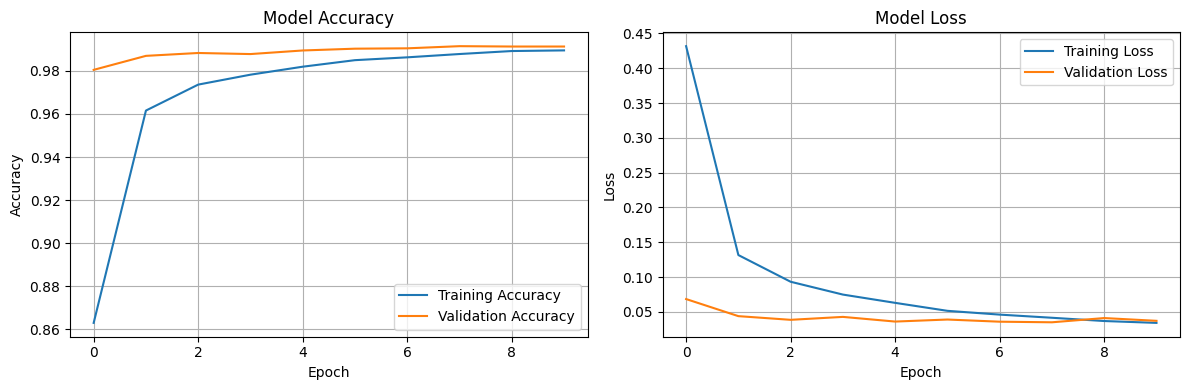

In [7]:
# Vẽ biểu đồ accuracy và loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Biểu đồ accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Biểu đồ loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


## 8. Đánh giá mô hình trên tập test


In [8]:
# Đánh giá mô hình trên tập test
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Test Loss: 0.0291
Test Accuracy: 0.9922 (99.22%)


## 9. Dự đoán và hiển thị một số kết quả mẫu


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


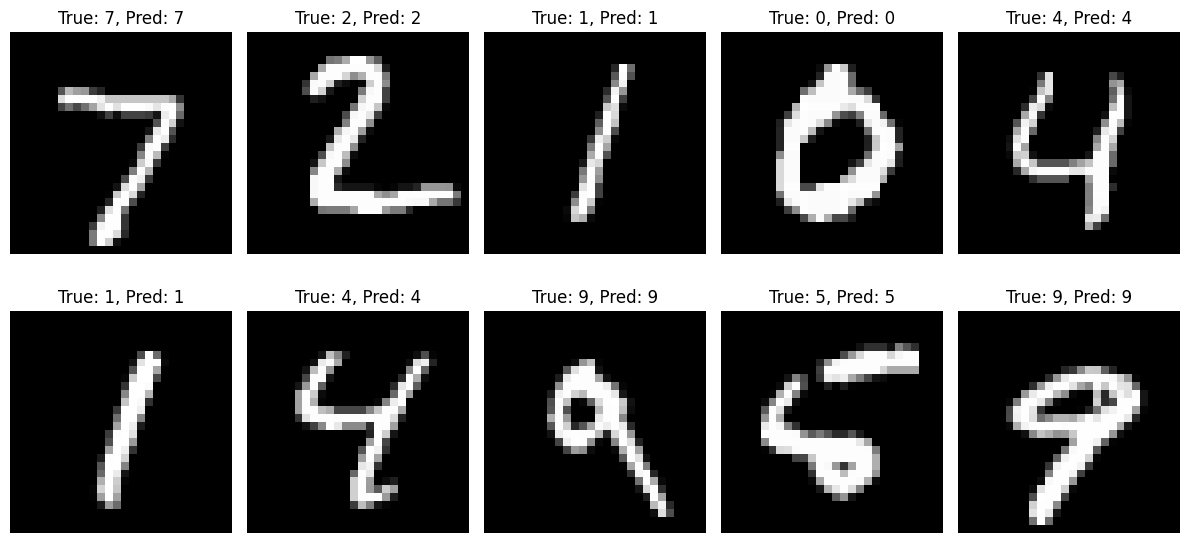

In [9]:
# Dự đoán trên tập test
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Hiển thị một số ảnh mẫu với dự đoán
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'True: {true_classes[i]}, Pred: {predicted_classes[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## 10. Lưu mô hình đã huấn luyện

Có thể lưu mô hình theo 2 cách:
1. **SavedModel format** (khuyến nghị): Lưu toàn bộ mô hình
2. **H5 format**: Lưu mô hình dạng HDF5


In [ ]:
import os

# Lưu mô hình vào thư mục hiện tại (models/)
# Lưu mô hình dạng SavedModel (khuyến nghị)
# model_savedmodel_path = 'cnn_mnist_keras'
# model.save(model_savedmodel_path)
# print(f"Mô hình đã được lưu dạng SavedModel tại: {model_savedmodel_path}/")

# Lưu mô hình dạng H5
model_h5_path = 'cnn_mnist_keras.h5'
model.save(model_h5_path)
print(f"Mô hình đã được lưu dạng H5 tại: {model_h5_path}")


Mô hình đã được lưu dạng H5 tại: cnn_mnist_keras.h5


## 11. Kiểm tra việc load lại mô hình (tùy chọn)


In [12]:
# Load lại mô hình đã lưu để kiểm tra
loaded_model = keras.models.load_model(model_h5_path)

# Kiểm tra accuracy trên tập test
test_loss_loaded, test_accuracy_loaded = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f"Mô hình đã load - Test Accuracy: {test_accuracy_loaded:.4f} ({test_accuracy_loaded*100:.2f}%)")
print("Mô hình đã được load thành công và hoạt động đúng!")


Mô hình đã load - Test Accuracy: 0.9922 (99.22%)
Mô hình đã được load thành công và hoạt động đúng!
